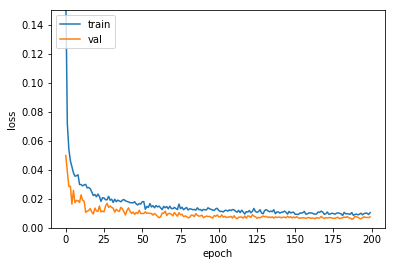

Train Score:  0.0075000207234
Validataion Score:  0.00757103893492
Test Score:  0.00757103893492


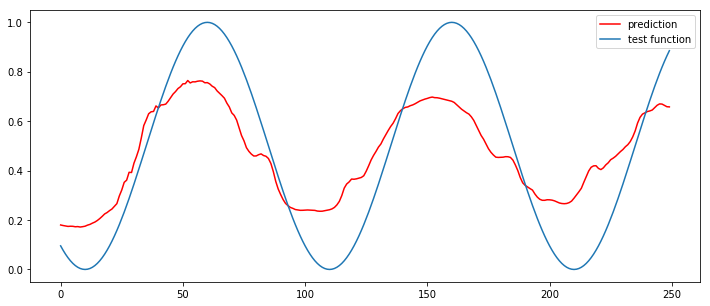

In [9]:
#다층 퍼셉트론 신경망
RESULT_NAME = "Part4_시계열_다층퍼셉트론"

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i+look_back,0])
    return np.array(dataX), np.array(dataY)

look_back = 40

signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

scaler = MinMaxScaler(feature_range=(0,1))
signal_data = scaler.fit_transform(signal_data)


train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)

#모델 구성
model = Sequential()
model.add(Dense(32, input_dim=40, activation='relu'))
model.add(Dropout(0.3))

for i in range(2):
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adagrad')

#모델 학습
import sys
oldStd = sys.stdout
filePath = './log/'
filePath += RESULT_NAME+'.txt'
sys.stdout = open(filePath,'w')
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))
sys.stdout = oldStd



plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

filePath = './결과/'
filePath += RESULT_NAME+'.png'
plt.savefig(filePath)
plt.show()

trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

#모델 사용하기
look_ahead = 250
xhat = x_test[0,None]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead], label="test function")
plt.legend()
plt.show()